# Lesson 3: Object Detection

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>


* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
    ```
    !pip install -q comet_ml transformers ultralytics torch
    ```

### Set up Comet

In [1]:
import comet_ml

Info about ['Comet'](https://www.comet.com/site/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3)

In [2]:
comet_ml.init(anonymous=True, project_name="3: OWL-ViT + SAM")

COMET INFO: Comet is now logging experiments in anonymous mode, they will be publicly accessing by using the experiment url
COMET INFO: Valid Comet API Key saved in /home/jovyan/.comet.config (set COMET_CONFIG to change where it is saved).


In [3]:
exp = comet_ml.Experiment()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/home/jovyan/work' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/busy-lard-9474/3-owl-vit-sam/b4fd0abd6dbe4ab1bfecf087fd8ad13f



### Load the image

In [4]:
# To display the image
from PIL import Image

In [5]:
logged_artifact = exp.get_artifact("L3-data", "anmorgan24")

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

In [6]:
local_artifact = logged_artifact.download("./")

COMET INFO: Artifact 'anmorgan24/L3-data:1.0.0' download has been started asynchronously
COMET INFO: Still downloading 6 file(s), remaining 24.23 MB/24.23 MB
COMET INFO: Artifact 'anmorgan24/L3-data:1.0.0' has been successfully downloaded


In [7]:
# Display the images
raw_image = Image.open("L3_data/dogs.jpg")
raw_image

### Get bounding boxes with OWL-ViT object detection model

>Note: `pipeline` is already installed for you in this classroom.

In [76]:
from transformers import pipeline

In [77]:
OWL_checkpoint = "./models/google/owlvit-base-patch32"

Info about ['google/owlvit-base-patch32'](https://huggingface.co/google/owlvit-base-patch32)

* Build the pipeline for the detector model.

In [78]:
# Load the model
detector = pipeline(
    model= OWL_checkpoint,
    task="zero-shot-object-detection"
)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [79]:
# What you want to identify in the image
text_prompt = "dog"

In [80]:
output = detector(
    raw_image,
    candidate_labels = [text_prompt]
)

In [81]:
# Print the output to identify the bounding boxes detected
output

[]

* Use the **util**'s function to prompt boxes in top of the image.

>Note: ```utils``` is an additional file containing the methods that have been already developed for you to be used in this classroom. 
For further details, please refer to the **Appendix** section located at the end of the lessons.

In [82]:
from utils import preprocess_outputs

In [83]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

In [84]:
from utils import show_boxes_and_labels_on_image

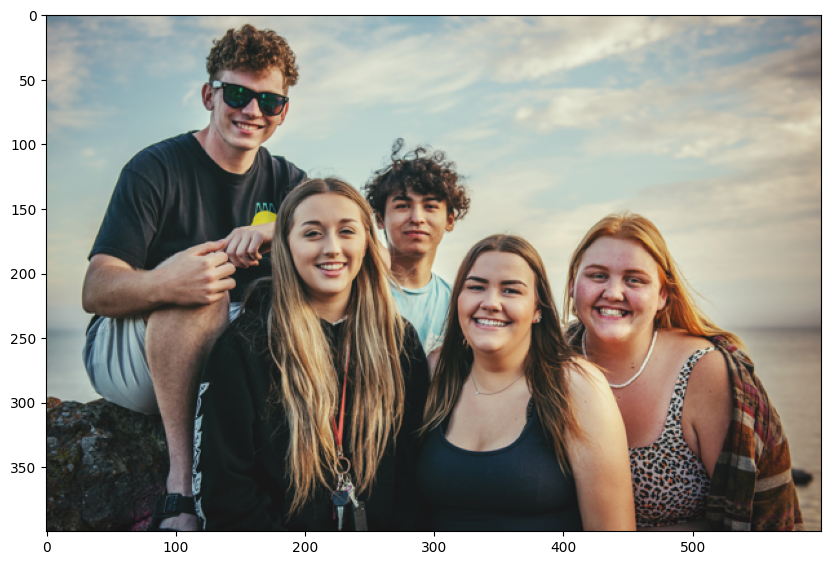

In [85]:
# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    raw_image,
    input_boxes[0],
    input_labels,
    input_scores
)

### Get segmentation masks using Mobile SAM

In [86]:
# Load the SAM model from the imported ultralytics library
from ultralytics import SAM

In [87]:
SAM_version = "mobile_sam.pt"

Info about [mobile_sam.pt](https://docs.ultralytics.com/models/mobile-sam/)

In [88]:
model = SAM(SAM_version)

* Generate an array using numpy.

In [89]:
import numpy as np

In [90]:
# Create a list of positive labels of same length as the number of predictions generated above
labels = np.repeat(1, len(output))

In [91]:
# Print the labels
labels

array([], dtype=int64)

In [92]:
result = model.predict(
    raw_image,
    bboxes=input_boxes[0],
    labels=labels
)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 1 but got size 0 for tensor number 1 in the list.

In [ ]:
result

In [ ]:
masks = result[0].masks.data
masks

In [ ]:
from utils import show_masks_on_image

In [ ]:
# Visualize the masks
show_masks_on_image(
    raw_image,
    masks
)

>Note: Please note that the results obtained from running this notebook may vary slightly from those demonstrated by the instructor in the video. 

### Image Editing: blur out faces

* Load the image.

In [ ]:
from PIL import Image

In [ ]:
image_path = "L3_data/people.jpg"

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

In [ ]:
raw_image = Image.open(image_path)
raw_image

In [ ]:
raw_image.size

* Resize the image.

In [ ]:
# Calculate width percent to maintain aspect ratio in resize transformation
mywidth = 600
wpercent = mywidth / float(raw_image.size[0])
wpercent

In [ ]:
# Calculate height percent to maintain aspect ratio in resize transformation
hsize = int( float(raw_image.size[1]) * wpercent )
hsize

In [ ]:
# Resize the image
raw_image = raw_image.resize([mywidth, hsize])
raw_image

In [ ]:
raw_image.size

In [ ]:
# Save the resized image
image_path_resized = "people_resized.jpg"
raw_image.save(image_path_resized)

### Detect faces

In [ ]:
candidate_labels = ["human face"]

In [93]:
# Define a new Comet experiment for this new pipeline
exp = comet_ml.Experiment()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/busy-lard-9474/3-owl-vit-sam/8bb355dc15a240e4889e920cc8a94695
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     images              : 3
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/home/jovyan/work' nor in any parent d

In [94]:
# Log raw image to the experiment
_ = exp.log_image(
    raw_image,
    name = "Raw image"
)

* Create bounding boxes with OWL-ViT.

In [95]:
# Apply detector model to the raw image
output = detector(
    raw_image,
    candidate_labels=candidate_labels
)

In [96]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

In [97]:
# Print values of the bounding box coordinates identified
input_boxes

[[[125, 49, 190, 79]]]

#### Log the images and bounding boxes.

In [98]:
metadata = {
    "OWL prompt": candidate_labels,
    "SAM version": SAM_version,
    "OWL Version": OWL_checkpoint
}

In [99]:
from utils import make_bbox_annots

In [100]:
annotations = make_bbox_annots(
    input_scores,
    input_labels,
    input_boxes,
    metadata
)

In [101]:
_ = exp.log_image(
    raw_image,
    annotations= annotations,
    metadata=metadata,
    name= "OWL output"
)

### Segmentation masks using SAM

In [102]:
result = model.predict(
    image_path_resized,
    bboxes=input_boxes[0],
    labels=np.repeat(1, len(input_boxes[0]))
)


image 1/1 /home/jovyan/work/people_resized.jpg: 1024x1024 2776.5ms
Speed: 7.6ms preprocess, 2776.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


### Blur entire image first

In [103]:
from PIL.ImageFilter import GaussianBlur

In [ ]:
blurred_img = raw_image.filter(GaussianBlur(radius=5))

In [ ]:
blurred_img 

In [ ]:
masks = result[0].masks.data.cpu().numpy()

In [ ]:
# Create an array of zeroes of the same shape as our image mask
total_mask = np.zeros(masks[0].shape)

In [ ]:
# Add each output mask to the total_mask
for mask in masks:
    total_mask = np.add(total_mask,mask)

In [ ]:
# Where there is any value other than zero (where any masks exist), show the blurred image
# Else, show the original (unblurred) image
output = np.where(
    np.expand_dims(total_mask != 0, axis=2),
    blurred_img,
    raw_image
)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Print image with faces blurred
plt.imshow(output)

* Log this image in the **Comet** platform.

In [ ]:
metadata = {
    "OWL prompt": candidate_labels,
    "SAM version": SAM_version,
    "OWL version": OWL_checkpoint
}

In [ ]:
_ = exp.log_image(
    output,
    name="Blurred masks",
    metadata = metadata,
    annotations=None
)

### Blur just faces of those not wearing sunglasses

In [ ]:
# New label
candidate_labels = ["a person without sunglasses"]

* Re-run the pipeline.

In [ ]:
exp = comet_ml.Experiment()

In [ ]:
_ = exp.log_image(raw_image, name="Raw image")

In [ ]:
output = detector(raw_image, candidate_labels=candidate_labels)

In [ ]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

In [ ]:
# Print the bounding box coordinates
input_boxes

* Explore what is happening in the **Comet** platform.

In [ ]:
from utils import make_bbox_annots

In [ ]:
metadata = {
    "OWL prompt": candidate_labels,
    "SAM version": SAM_version,
    "OWL version": OWL_checkpoint,
}

In [ ]:
annotations = make_bbox_annots(
    input_scores,
    input_labels,
    input_boxes,
    metadata
)

In [ ]:
_ = exp.log_image(
    raw_image,
    annotations=annotations,
    metadata=metadata,
    name="OWL output no sunglasses"
)

In [ ]:
result = model.predict(
    image_path_resized,
    bboxes=input_boxes[0],
    labels=np.repeat(1, len(input_boxes[0]))
)

In [ ]:
from PIL.ImageFilter import GaussianBlur
blurred_img = raw_image.filter(GaussianBlur(radius=5))

In [ ]:
masks = result[0].masks.data.cpu().numpy()

total_mask = np.zeros(masks[0].shape)
for mask in masks:
    total_mask = np.add(total_mask, mask)

In [ ]:
# Print the result
output = np.where(
    np.expand_dims(total_mask != 0, axis=2),
    blurred_img,
    raw_image
)
plt.imshow(output)

* Analyze results in the **Comet** platform.

In [ ]:
metadata = {
    "OWL prompt": candidate_labels,
    "SAM version": SAM_version,
    "OWL version": OWL_checkpoint,
}

In [ ]:
_ = exp.log_image(
    output,
    name="Blurred masks no sunglasses",
    metadata=metadata,
    annotations=None
)

### Try yourself! 
Try the image editing with the following images.

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

In [ ]:
cafe_img = Image.open("L3_data/cafe.jpg")
cafe_img

In [ ]:
crosswalk_img = Image.open("L3_data/crosswalk.jpg")
crosswalk_img

In [ ]:
metro_img = Image.open("L3_data/metro.jpg")
metro_img

In [ ]:
friends_img = Image.open("L3_data/friends.jpg")
friends_img

### Additional Resources

* For more on how to use [Comet](https://www.comet.com/site/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3) for experiment tracking, check out this [Quickstart Guide](https://colab.research.google.com/drive/1jj9BgsFApkqnpPMLCHSDH-5MoL_bjvYq?usp=sharing) and the [Comet Docs](https://www.comet.com/docs/v2/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3).
* This course was based off a set of two blog articles from Comet. Explore them here for more on how to use newer versions of Stable Diffusion in this pipeline, additional tricks to improve your inpainting results, and a breakdown of the pipeline architecture:
  * [SAM + Stable Diffusion for Text-to-Image Inpainting](https://www.comet.com/site/blog/sam-stable-diffusion-for-text-to-image-inpainting/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3)
  * [Image Inpainting for SDXL 1.0 Base Model + Refiner](https://www.comet.com/site/blog/image-inpainting-for-sdxl-1-0-base-refiner/?utm_source=dlai&utm_medium=course&utm_campaign=prompt_engineering_for_vision_models&utm_content=dlai_L3)